# Selenium - Intermediate

#### 다룰 내용
1. Selenium 웹 데이터 스크래핑
2. Selenium 네이버 메일 크롤링
3. Selenium 이미지 스크린샷

## 1. Selenium 웹 데이터 스크래핑
- gmarket 베스트셀러 데이터 수집하기
- gmarket best의 200개 상품의 이름/가격/할인가격/링크 가져오기

### 1.1 webdriver 실행하고 gmarket best 페이지로 이동

In [1]:
from selenium import webdriver

In [2]:
url = "http://corners.gmarket.co.kr/Bestsellers"
driver = webdriver.Chrome() 
driver.get(url)

![](https://github.com/hyeshinoh/Study_Web/blob/master/web_09_image_001.png?raw=true)

### 1.2 best 200 상품의 정보 스크래핑

#### 200개 상품 정보 저장하기

In [10]:
items = driver.find_elements_by_css_selector(".best-list:nth-child(3) > ul > li")

len(items)

200

#### 200개 상품의 이름/가격/할인가격/링크 pandas dataframe으로 만들기

In [11]:
dict_list = []
for item in items:
    dict_list.append({
        "title": item.find_element_by_css_selector(".itemname").text,
        "s price": item.find_element_by_css_selector(".s-price").text.split(" ")[0].replace(",","")[:-1],
        "o price": item.find_element_by_css_selector(".o-price").text.split(" ")[0].replace(",","")[:-1],
        "link": item.find_element_by_css_selector(".itemname").get_attribute("href")
    })

df = pd.DataFrame(dict_list)
df.tail()

,link,o price,s price,title
195,http://item.gmarket.co.kr/Item?goodscode=24630...,22900,6900,애견패딩 겨울옷 모음/애견의류/강아지옷/애견옷
196,http://item.gmarket.co.kr/Item?goodscode=11011...,50000,32900,[맥심]맥심 화이트 골드 커피믹스 320T 김연아커피/모카골드
197,http://item.gmarket.co.kr/Item?goodscode=14767...,38400,32900,[맥심]화이트골드 320T/커피믹스/커피
198,http://item.gmarket.co.kr/Item?goodscode=17872...,,69000,윤남텍 간편세척 초음파 다목적 가습기/YN-101/G마켓
199,http://item.gmarket.co.kr/Item?goodscode=93244...,26300,7900,소녀나라 10%쿠폰/맨투맨/후드티/아우터/팬츠/스커트


#### sale하지 않는 품목에 o price 채우기

o price가 NaN인지(True) 아닌지 (False) is_nodata에 저장 

In [17]:
is_nodata = df["o price"] == ""

비어있는 o price 칸에 s price의 값을 넣기

In [18]:
df["s price"][is_nodata] # `df["s price"]`에서 is_nodata가 true인 행

9       13800
27      24900
30       5900
42       5900
43      14990
49      34000
59       6900
60      34000
70      39600
74       7900
75      12900
78      12900
85      25000
88      12900
101    164000
105     13800
106     10900
119     12700
124     25900
136      6400
137     12900
142     41600
143     43900
150     24900
151     23900
153     12700
164    199000
176     25580
178     47900
192     12700
198     69000
Name: s price, dtype: object

In [20]:
df["o price"][is_nodata] = df["s price"][is_nodata]
df.tail()

,link,o price,s price,title
195,http://item.gmarket.co.kr/Item?goodscode=24630...,22900,6900,애견패딩 겨울옷 모음/애견의류/강아지옷/애견옷
196,http://item.gmarket.co.kr/Item?goodscode=11011...,50000,32900,[맥심]맥심 화이트 골드 커피믹스 320T 김연아커피/모카골드
197,http://item.gmarket.co.kr/Item?goodscode=14767...,38400,32900,[맥심]화이트골드 320T/커피믹스/커피
198,http://item.gmarket.co.kr/Item?goodscode=17872...,69000,69000,윤남텍 간편세척 초음파 다목적 가습기/YN-101/G마켓
199,http://item.gmarket.co.kr/Item?goodscode=93244...,26300,7900,소녀나라 10%쿠폰/맨투맨/후드티/아우터/팬츠/스커트


#### 할인율 column 추가하기

In [21]:
df["o price"] = df["o price"].astype("int")
df["s price"] = df["s price"].astype("int")

In [24]:
df["sale"] = round((1 - (df["s price"] / df["o price"])), 2)*100
df["sale"] = df["sale"].astype("int").astype("str")+"%"

In [25]:
df.tail()

,link,o price,s price,title,sale
195,http://item.gmarket.co.kr/Item?goodscode=24630...,22900,6900,애견패딩 겨울옷 모음/애견의류/강아지옷/애견옷,70%
196,http://item.gmarket.co.kr/Item?goodscode=11011...,50000,32900,[맥심]맥심 화이트 골드 커피믹스 320T 김연아커피/모카골드,34%
197,http://item.gmarket.co.kr/Item?goodscode=14767...,38400,32900,[맥심]화이트골드 320T/커피믹스/커피,14%
198,http://item.gmarket.co.kr/Item?goodscode=17872...,69000,69000,윤남텍 간편세척 초음파 다목적 가습기/YN-101/G마켓,0%
199,http://item.gmarket.co.kr/Item?goodscode=93244...,26300,7900,소녀나라 10%쿠폰/맨투맨/후드티/아우터/팬츠/스커트,70%


In [60]:
driver.quit()

## 2. Selenium 네이버 메일 크롤링
- 네이버 페이지로 이동
- 아이디 패스워드로 로그인
- 전체 메일 수, 안읽은 메일 수를 가져오기
- 메일 제목과 요약을 데이터프레임으로 만들기

### 2.1 webdriver 실행하고 naver로 이동

In [2]:
main_url = "http://naver.com"
mail_url = "http://mail.naver.com"

In [3]:
# 네이버 페이지로 이동
driver = webdriver.Chrome()
driver.get(main_url)

![](https://github.com/hyeshinoh/Study_Web/blob/master/web_09_image_002.png?raw=true)

### 2.2 네이버 로그인하기

#### 아이디 패스워드 입력
비밀번호는 노출해서는 안되므로 pickle 파일로 저장해서 불러오기

In [6]:
import pickle

In [64]:
# with open("naver_pw.plk", "wb") as f:
#     pickle.dump("본인의 네이버 pw", f)

In [9]:
my_id = "panda706"
my_pw = pickle.load(open("naver_pw.plk", "rb"))

로그인 버튼 클릭 & 로그인 페이지로 이동

In [4]:
driver.find_element_by_css_selector(".lg_local_btn").click()

![](https://github.com/hyeshinoh/Study_Web/blob/master/web_09_image_003.png?raw=true)

아이디와 패스워드 넣고 로그인 버튼 클릭하기  

In [10]:
driver.find_element_by_css_selector("#id").send_keys(my_id)
driver.find_element_by_css_selector("#pw").send_keys(my_pw)

In [11]:
driver.find_element_by_css_selector(".btn_global").click()

![](https://github.com/hyeshinoh/Study_Web/blob/master/web_09_image_004.png?raw=true)

### 2.3 네이버 메일로 이동해서 메일 데이터 가져오기

In [13]:
driver.get(mail_url)

![](https://github.com/hyeshinoh/Study_Web/blob/master/web_09_image_005.png?raw=true)

#### 전체 메일 갯수 가져오기

In [14]:
total_mail_count = driver.find_element_by_css_selector("#headTotalNum").text
total_mail_count

'110'

#### 안 읽은 메일 갯수 가져오기

In [15]:
unread_mail_count = driver.find_element_by_css_selector("#headUnreadNum").text
unread_mail_count

'105'

#### 메일 데이터 가져오기 - 제목, 보낸사람, 메일링크

In [16]:
mails = driver.find_elements_by_css_selector(".mailList > li")
df = pd.DataFrame(columns = ["제목", "보낸사람", "메일링크"])
for mail in mails:
    title = mail.find_element_by_css_selector(".mail_title").text
    name = mail.find_element_by_css_selector(".name").text
    link = mail.find_element_by_css_selector(".subject > a").get_attribute("href")
    df.loc[len(df)] = {"제목":title, "보낸사람":name, "메일링크":link}
    
df

,제목,보낸사람,메일링크
0,(광고) 화려한 마케팅보다 병원의 브렌드보다 수술결과 최고의 만족을 드리겠습니다.,Namepr,https://mail.naver.com/read/popup/?nMailId=8404
1,(광고) 룰렛돌리고 1억만드는비법 무료로 받아보세요~,이벤트메일,https://mail.naver.com/read/popup/?nMailId=8403
2,(광고) 창업을 생각중이라면 추천하고 싶은 성공창업을 위한 무점포1인창업과 창업정보...,창업신문,https://mail.naver.com/read/popup/?nMailId=8402
3,"(광고) 임플란트, 치아교정 지원자를 찾습니다~",이벤트메일,https://mail.naver.com/read/popup/?nMailId=8401
4,(광고) 1년안에 1억만들기 이것만 알고있으면 가능하다?~(무료정보제공),이벤트메일,https://mail.naver.com/read/popup/?nMailId=8400
5,내 평생 가장 맛있는 음식,따뜻한하루,https://mail.naver.com/read/popup/?nMailId=8399
6,N스토어 주식회사 분할 신설에 따른 개인정보 이전 안내,N스토어,https://mail.naver.com/read/popup/?nMailId=8398
7,SMTP send file 테스트,hyeshinoh@gmail.co..,https://mail.naver.com/read/popup/?nMailId=8397
8,SMTP send file 테스트,hyeshinoh@gmail.co..,https://mail.naver.com/read/popup/?nMailId=8396
9,hyeshin의 SMTP Send Text 테스트,hyeshinoh@gmail.co..,https://mail.naver.com/read/popup/?nMailId=8395


In [17]:
driver.quit()

## 3. Selenium 이미지 스크린샷
- youtube 페이지를 이미지로 스크린샷을 만들기
- 영상 있는 부분의 위치를 파악
- 영상이 있는 부분을 pillow를 이용해서 자르기
- 영상을 저장해서 위에서 실습했던 google vision api에 넣어서 결과를 확인 

### 3.1 pillow 패키지
- python에서 사용하는 이미지 처리 패키지
- 설치
    - mac: `$ pip3 install pillow`
    - window: 5.1 버전은 jupyter에 문제 없음
        - `$ conda install -c anaconda pillow`
        - `$ conda uninstall pillow`
        - `$ conda install -c conda-forge pillow`

In [19]:
from PIL import Image as pil
import time

### 3.2 webdriver 실행하고 youtube 영상 스크린샷 저장

스크린샷을 저장할 "WWDC 2018 Keynote - Apple" 영상의 url을 저장

In [20]:
url = "https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s"

webdriver 실행하고 영상 실행 화면을 스크린샷

In [21]:
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)
driver.save_screenshot("screenshot.png")

for idx in range(3):
    time.sleep(1)
    driver.save_screenshot("screenshot" + str(idx) + ".png")

True

### 3.3 스크린샷 이미지 편집

#### 저장한 스크린샷 이미지 확인
스크린샷을 뜬 이미지는 아래와 같이 브라우저 전체를 담고 있음

(2400, 1290)


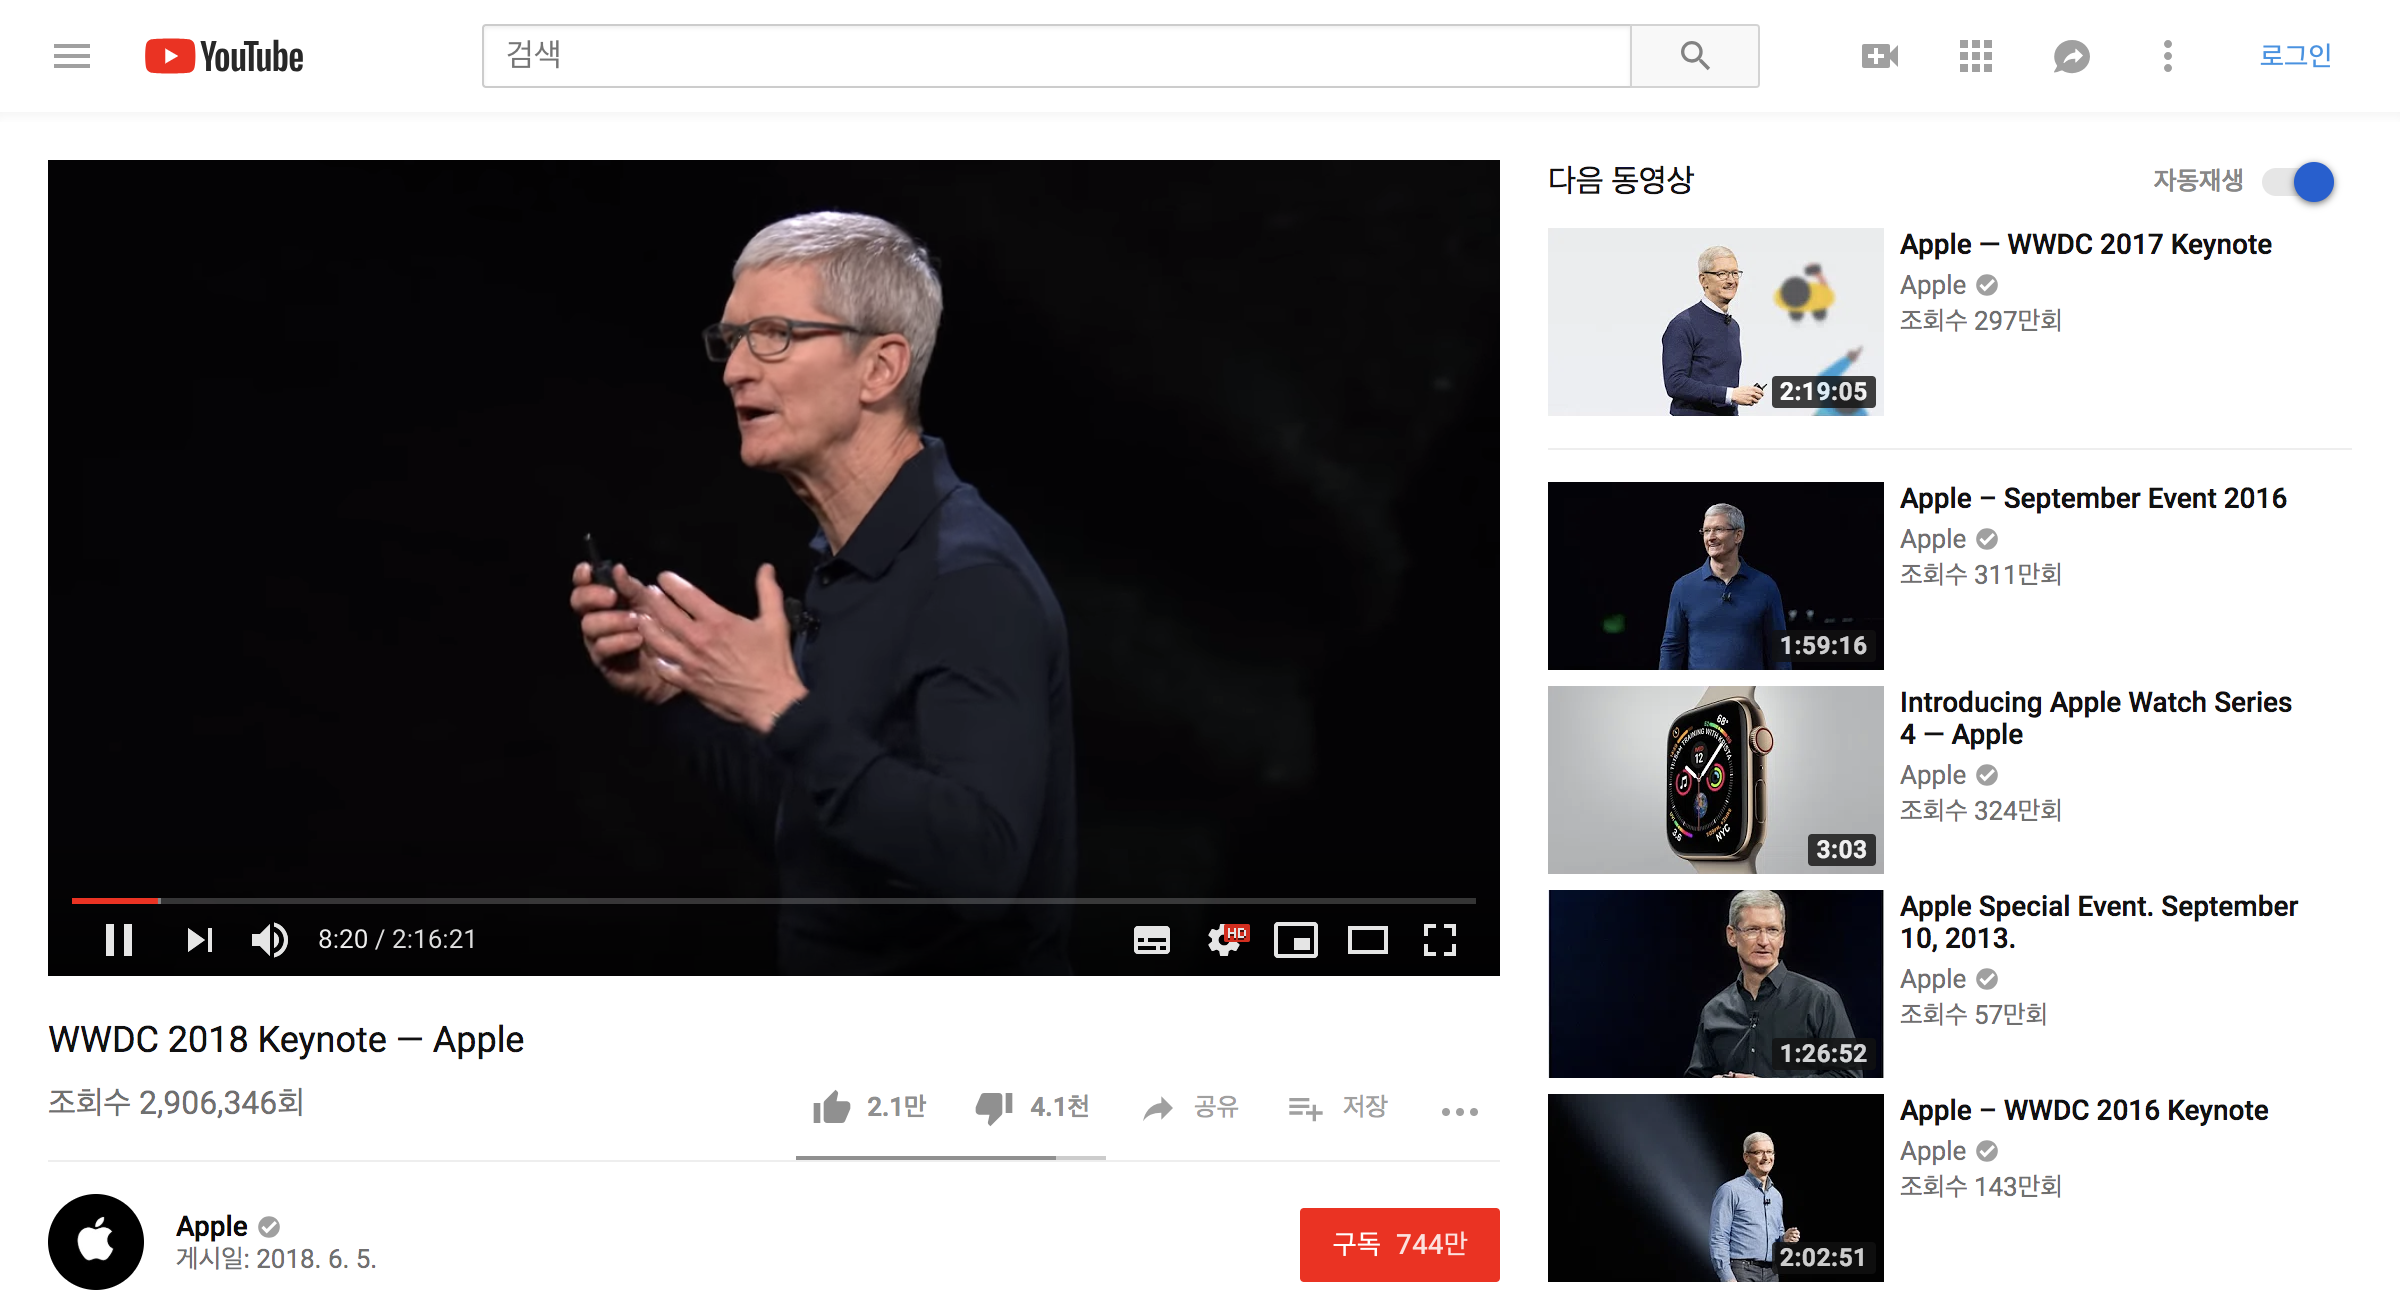

In [22]:
pil_im = pil.open("screenshot.png")
print(pil_im.size)
pil_im

#### 영상이 나오는 영역만 자르기

영상이 재생되는 영역의 시작점과 크기를 구하기

In [23]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

({'x': 24, 'y': 80}, {'height': 408, 'width': 726})

이미지 잘라내기
- top, bottom, left, right를 구해서 잘라낼 area 지정  
(retina display의 경우: 각각 곱하기 2)

In [33]:
left = location["x"]*2
top = location ["y"]*2
right = left + size["width"]*2
bottom = top + size["height"]*2
area = (left, top, right, bottom)
area

(48, 160, 1500, 976)

이미지 잘라내기

In [35]:
pil_im = pil_im.crop(area)
pil_im.save("screenshot_element.png")

잘라낸 결과 이미지

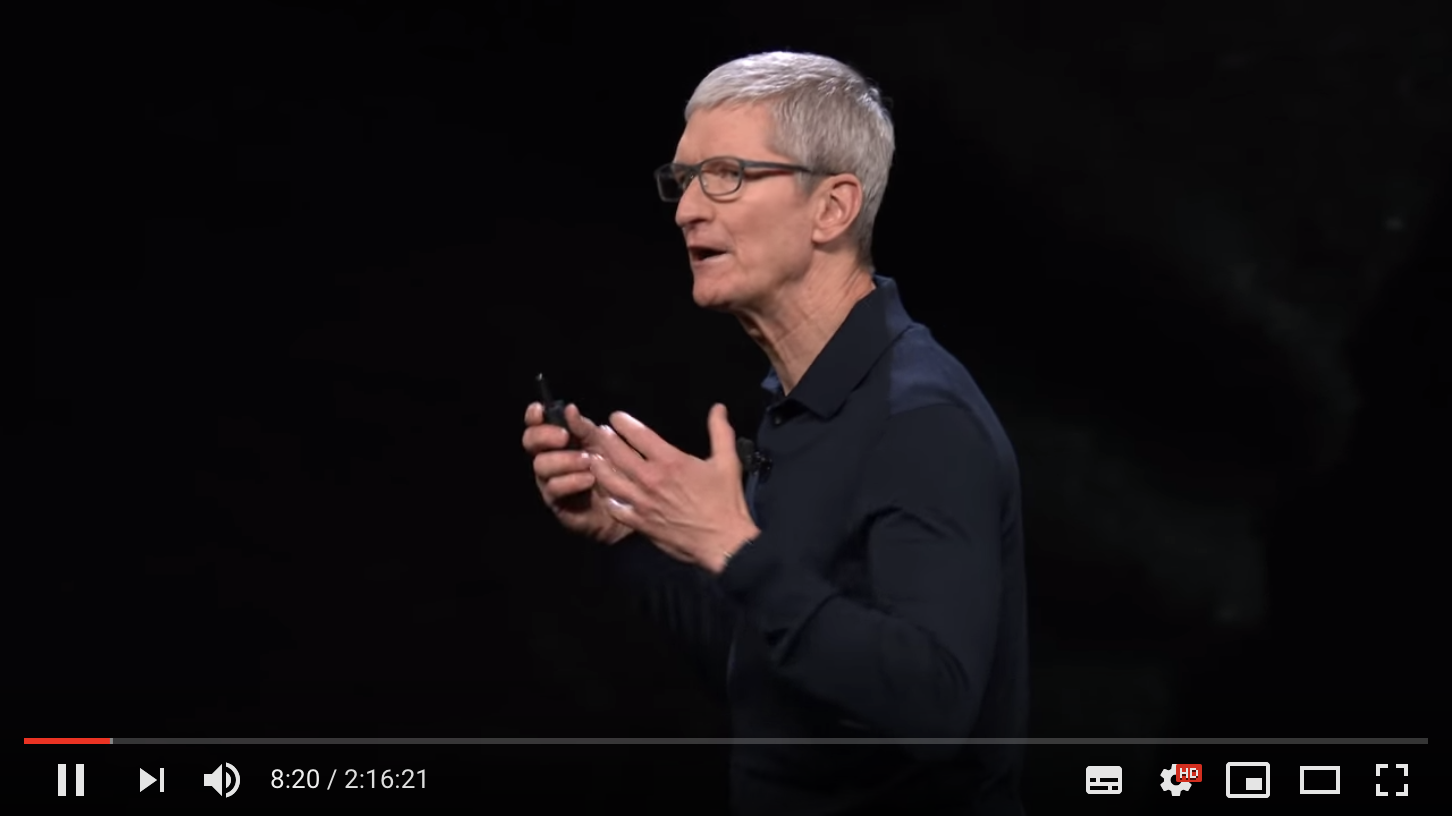

In [37]:
pil_im = pil.open("screenshot_element.png")
pil_im

잘라낸 부분에서 하단의 메뉴바 부분까지 잘라내기

In [38]:
element = driver.find_element_by_css_selector(".ytp-chrome-bottom")
playbar_height = element.size["height"]

In [39]:
left = location["x"] * 2
top = location ["y"] * 2
right = left + size["width"] * 2
bottom = top + size["height"] *2 - playbar_height *2
area = (left, top, right, bottom)
area

(48, 160, 1500, 898)

In [40]:
pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im.save("screenshot_element2.png")

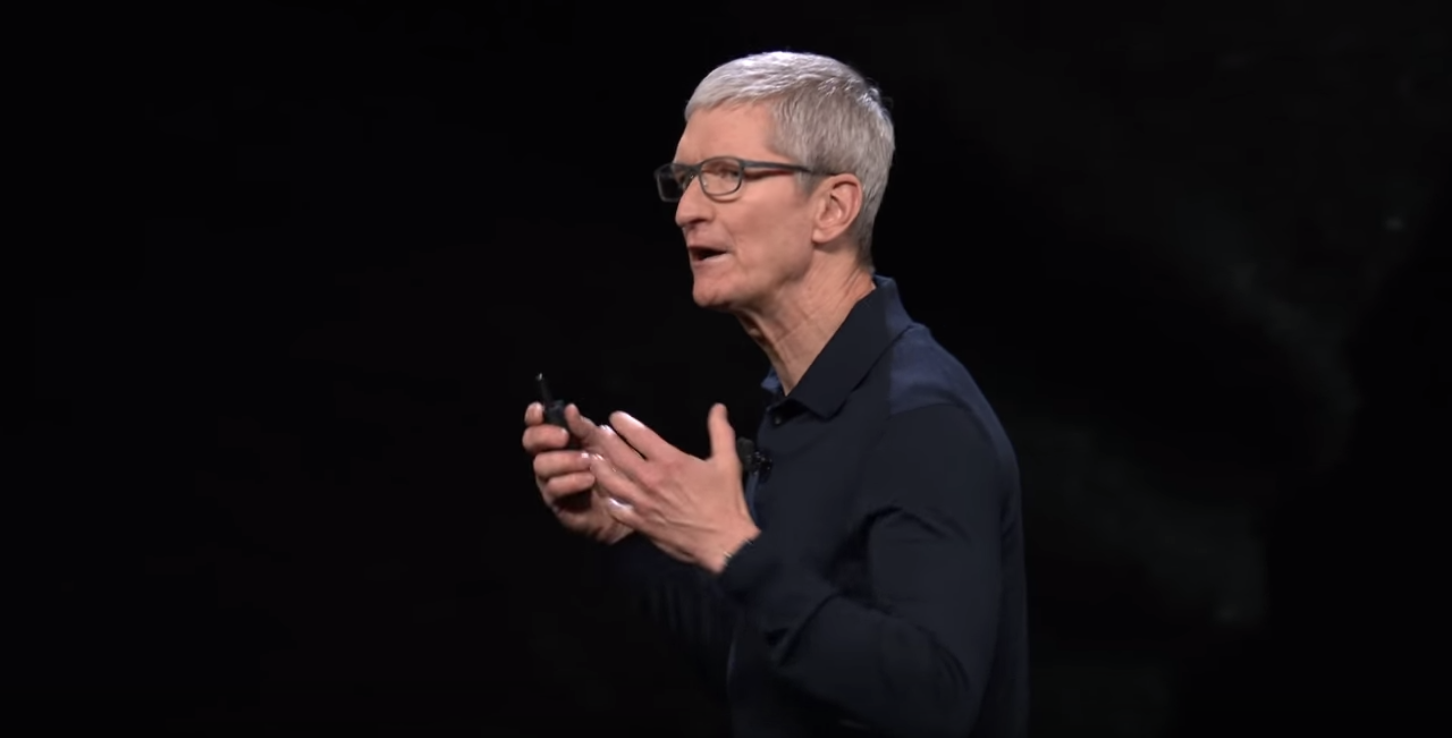

In [41]:
pil_im = pil.open("screenshot_element2.png")
pil_im

#### 썸네일로 만들기
- 서비스할 때 작은 사이즈의 썸네일을 만들어서 씀으로써 트래픽 비용 절감

In [42]:
pil_im.size

(1452, 738)

In [43]:
pil_im.thumbnail((320,160))

In [44]:
driver.quit()